# Imports


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, date, timedelta
import requests
from bs4 import BeautifulSoup
import json
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initial Data Prep

**Read in initial data**

In [2]:
# data = pd.read_csv("wildfire_data.csv", low_memory = False)
# data

In [3]:
# data.columns

Create small subset to send.

In [4]:
# to_send = data.iloc[:500, :].reset_index()

# # save to csv file
# path = "/Users/lmhartmann/Desktop/Weather/to_send.csv"
# data.to_csv(path)

Keep selected columns.

In [5]:
# to_keep = ["LONGITUDE", "LATITUDE", "OBJECTID",
#            "OWNER_DESCR",
#            "FIRE_YEAR", "DISCOVERY_DATE",
#            "DISCOVERY_DOY", "DISCOVERY_TIME",
#            "NWCG_CAUSE_CLASSIFICATION", "CONT_DATE",
#            "CONT_DOY", "CONT_TIME",
#            "STATE", "COUNTY", "FIPS_CODE", "FIPS_NAME", "FIRE_SIZE",
#            "FIRE_SIZE_CLASS"]

In [6]:
# raw_data = data.copy()
# data = data[to_keep].copy()
# data

Select only Natural fires and USFS fires.

In [7]:
# data = data.loc[(data["NWCG_CAUSE_CLASSIFICATION"] == "Natural")]
# data = data.loc[data["OWNER_DESCR"] == "USFS"]

Check datatypes and unique values.

In [8]:
# data.dtypes

In [9]:
# print(data["NWCG_CAUSE_CLASSIFICATION"].unique())
# print(len(data["STATE"].unique()))
# print(data["OWNER_DESCR"].unique())

Reset index.

In [10]:
# data = data.reset_index()
# data

Select further sumsbet of columns.

In [11]:
# # drop 'index', 'owner_descr', 'nwcg_cause_classification'
# data = data.drop(["index", "OWNER_DESCR", "NWCG_CAUSE_CLASSIFICATION"], axis = 1)
# data

Initial null check.

In [12]:
# data.isnull().sum()

In [13]:
# print("Percent Null: Discovery Time: ", 34/len(data)*100)
# print("Percent Null: Cont Date: ", 3987/len(data)*100)
# print("Percent Null: Cont Doy: ", 3987/len(data)*100)
# print("Percent Null: Cont Time: ", 4412/len(data)*100)
# print("Percent Null: County: ", 58658/len(data)*100)
# print("Percent Null: Fips Code: ", 58658/len(data)*100)
# print("Percent Null: Fips Name: ", 58658/len(data)*100)

Select portion of data and collect weather data and save.

In [14]:
# df1 = data.iloc[:5000, :]

In [15]:
# # get weather data

# # initalize new dataframe
# weather_df = pd.DataFrame(columns = ["DISCOVERY_DATE", "TIME", "TEMPERATURE",
#                                      "RELATIVE_HUMIDITY", "PRECIPITATION", "SURFACE_PRESSURE",
#                                      "CLOUD_COVER", "WIND_SPEED_10M", "WIND_SPEED_100M",
#                                      "WIND_GUSTS_10M"])

# # base website
# url = "https://archive-api.open-meteo.com/v1/archive?"

# # for loop through dataframe
# for row in range(len(df1)):

#     discov = datetime.strptime(str.rstrip(df1["DISCOVERY_DATE"][row][0:19]), "%Y/%m/%d %H:%M:%S")
#     prior = discov - timedelta(weeks = 2)
#     # convert into strings
#     discov_str = "&end_date=" + discov.strftime("%Y-%m-%d")
#     prior_str = "&start_date=" + prior.strftime("%Y-%m-%d")

#     long = "&longitude=" + str(df1["LONGITUDE"][row])
#     lat = "latitude=" + str(df1["LATITUDE"][row])

#     over_req = "&hourly=temperature_2m,relative_humidity_2m,precipitation,surface_pressure,cloud_cover,wind_speed_10m,wind_speed_100m,wind_gusts_10m"

#     final_url = url + lat + long + prior_str + discov_str + over_req

#     response = requests.get(final_url)
#     soup = BeautifulSoup(response.content, "html.parser")

#     site_json = json.loads(soup.text)

#     # go through every day in the two weeks and pull following information
#     time = site_json["hourly"]["time"]
#     temperature = site_json["hourly"]["temperature_2m"]
#     rel_hum = site_json["hourly"]["relative_humidity_2m"]
#     precip = site_json["hourly"]["precipitation"]
#     sur_pres = site_json["hourly"]["surface_pressure"]
#     cloud_cover = site_json["hourly"]["cloud_cover"]
#     wind_speed_10m = site_json["hourly"]["wind_speed_10m"]
#     wind_speed_100m = site_json["hourly"]["wind_speed_100m"]
#     wind_gusts_10m = site_json["hourly"]["wind_gusts_10m"]

#     for i in range(len(site_json["hourly"]["time"])):
#         row_to_add = [df1["DISCOVERY_DATE"][row], time[i], temperature[i],
#                       rel_hum[i], precip[i], sur_pres[i], cloud_cover[i],
#                       wind_speed_10m[i], wind_speed_100m[i], wind_gusts_10m[i]]

#         weather_df.loc[len(weather_df)] = row_to_add

#     if (row % 50 == 0):
#         print("Row: ", row)

#     # save to csv file
#     path = "/Users/lmhartmann/Desktop/Weather/df1.csv"
#     weather_df.to_csv(path)

# Load in Weather Data and Created Merged Data

In [16]:
# path = "/Users/lmhartmann/Desktop/Weather/df1.csv"
# weather = pd.read_csv(path, low_memory = False)
# weather

Add the 'fire_number' (id_value) to weather dataframe.

In [17]:
# # each fire now has 360 rows
# # create new column and name 0 through 4999 identifying for each fire

# weather["fire_number"] = np.nan

# i = 0
# for row in range(len(weather)):

#     weather["fire_number"][row] = i

#     if ((row + 1) % 360) == 0:
#         i += 1

# weather

In [18]:
# # make weather to int
# weather["fire_number"] = weather["fire_number"].astype(int)

# # create "fire_number" equal to index
# df1['fire_number'] = df1.index
# df1

Merge weather info with fire info.

In [19]:
# # merge df1 and weather on "fire_number"
# data = weather.merge(df1, on='fire_number')

# data

### Save to create dataset we will work with/

Check for nulls.

In [20]:
# data.isnull().sum()

In [21]:
# print("Percent Null: Cont Date: ", 1800/len(data)*100)
# print("Percent Null: Cont Doy: ", 1800/len(data)*100)
# print("Percent Null: Cont Time: ", 2160/len(data)*100)
# print("Percent Null: County: ", 156240/len(data)*100)
# print("Percent Null: Fips Code: ", 156240/len(data)*100)
# print("Percent Null: Fips Name: ", 156240/len(data)*100)

Further narrow columns.

In [22]:
# # decide to keep
# to_keep = ["LONGITUDE", "LATITUDE",
#            "DISCOVERY_DATE_x", "TIME", "TEMPERATURE",
#            "RELATIVE_HUMIDITY", "PRECIPITATION", "SURFACE_PRESSURE",
#            "CLOUD_COVER", "WIND_SPEED_10M", "WIND_SPEED_100M",
#            "WIND_GUSTS_10M", "STATE",
#            "FIRE_SIZE", "FIRE_SIZE_CLASS"]

# data = data[to_keep].copy()
# data

Export.

In [23]:
# # export
# path = "/Users/lmhartmann/Desktop/Capstone/data_merged.csv"
# data.to_csv(path)

# Data Exploration

Load in data.

In [4]:
path = "/content/data_merged.csv"
data = pd.read_csv(path).drop(["Unnamed: 0"], axis = 1)
data

,LONGITUDE,LATITUDE,DISCOVERY_DATE_x,TIME,TEMPERATURE,RELATIVE_HUMIDITY,PRECIPITATION,SURFACE_PRESSURE,CLOUD_COVER,WIND_SPEED_10M,WIND_SPEED_100M,WIND_GUSTS_10M,STATE,FIRE_SIZE,FIRE_SIZE_CLASS
0,-120.404444,38.933056,2004/05/12 00:00:00+00,2004-04-28T00:00,17.3,26,0.0,822.5,14,14.8,22.0,46.8,CA,0.25,A
1,-120.404444,38.933056,2004/05/12 00:00:00+00,2004-04-28T01:00,15.9,30,0.0,821.3,15,13.9,20.9,45.0,CA,0.25,A
2,-120.404444,38.933056,2004/05/12 00:00:00+00,2004-04-28T02:00,13.2,40,0.0,819.7,16,10.6,18.6,40.0,CA,0.25,A
3,-120.404444,38.933056,2004/05/12 00:00:00+00,2004-04-28T03:00,10.9,49,0.0,818.5,14,6.3,15.6,29.2,CA,0.25,A
4,-120.404444,38.933056,2004/05/12 00:00:00+00,2004-04-28T04:00,11.5,45,0.0,818.8,4,7.2,11.4,22.3,CA,0.25,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799995,-121.966667,43.803889,2006/07/26 00:00:00+00,2006-07-26T19:00,27.0,15,0.0,837.2,0,5.9,7.8,23.4,OR,0.10,A
1799996,-121.966667,43.803889,2006/07/26 00:00:00+00,2006-07-26T20:00,28.1,16,0.0,837.6,0,7.0,9.6,27.4,OR,0.10,A
1799997,-121.966667,43.803889,2006/07/26 00:00:00+00,2006-07-26T21:00,28.8,17,0.0,837.6,0,7.8,10.7,29.5,OR,0.10,A
1799998,-121.966667,43.803889,2006/07/26 00:00:00+00,2006-07-26T22:00,29.0,18,0.0,837.3,0,8.4,11.4,31.3,OR,0.10,A


Fire Size Histogram

<Axes: xlabel='FIRE_SIZE_CLASS', ylabel='Count'>

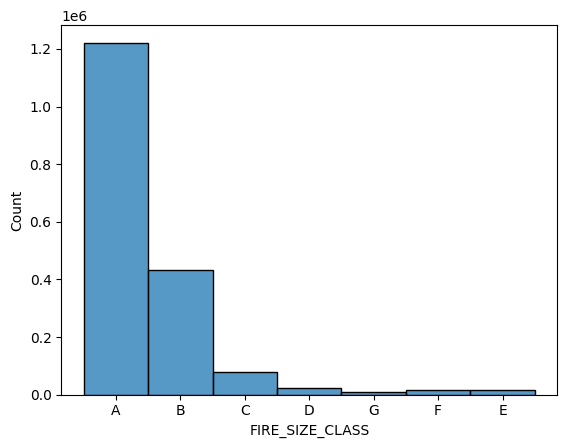

In [5]:
sns.histplot(data = data, x = "FIRE_SIZE_CLASS")

## Outliers

In [6]:
data.isnull().sum()

LONGITUDE            0
LATITUDE             0
DISCOVERY_DATE_x     0
TIME                 0
TEMPERATURE          0
RELATIVE_HUMIDITY    0
PRECIPITATION        0
SURFACE_PRESSURE     0
CLOUD_COVER          0
WIND_SPEED_10M       0
WIND_SPEED_100M      0
WIND_GUSTS_10M       0
STATE                0
FIRE_SIZE            0
FIRE_SIZE_CLASS      0
dtype: int64

In [10]:
def outliers_IQR(col):
    q1 = col.quantile(0.25)

    q3 = col.quantile(0.75)

    IQR = q3 - q1

    outliers = col[((col < (q1 - 1.5 * IQR)) | (col > (q3 + 1.5 * IQR)))]

    return outliers

In [8]:
def outliers_sd(col):
    three_sd = 3 * col.std()

    median = col.median()

    outliers = col[(col > (median + three_sd)) | (col < (median - three_sd))]

    return outliers

In [15]:
data.columns

Index(['LONGITUDE', 'LATITUDE', 'DISCOVERY_DATE_x', 'TIME', 'TEMPERATURE',
       'RELATIVE_HUMIDITY', 'PRECIPITATION', 'SURFACE_PRESSURE', 'CLOUD_COVER',
       'WIND_SPEED_10M', 'WIND_SPEED_100M', 'WIND_GUSTS_10M', 'STATE',
       'FIRE_SIZE', 'FIRE_SIZE_CLASS'],
      dtype='object')

In [23]:
no_outliers = ["LONGITUDE", "LATITUDE", "DISCOVERY_DATE_x", "TIME",
               "STATE", "FIRE_SIZE", "FIRE_SIZE_CLASS"]

for col in data.columns:
  if col in no_outliers:
    pass
  else:
    outs_IQR = outliers_IQR(data[col])
    print("\n Percent " + col + " Outliers by IQR: ",
          len(outs_IQR)/len(data)*100)

    outs_sd = outliers_sd(data[col])
    print("Percent " + col + " Outliers by Standard Deviation: ",
          len(outs_sd)/len(data)*100)



 Percent TEMPERATURE Outliers by IQR:  0.2205
Percent TEMPERATURE Outliers by Standard Deviation:  0.11905555555555555

 Percent RELATIVE_HUMIDITY Outliers by IQR:  0.0
Percent RELATIVE_HUMIDITY Outliers by Standard Deviation:  0.0

 Percent PRECIPITATION Outliers by IQR:  5.974111111111111
Percent PRECIPITATION Outliers by Standard Deviation:  1.2362777777777778

 Percent SURFACE_PRESSURE Outliers by IQR:  2.964722222222222
Percent SURFACE_PRESSURE Outliers by Standard Deviation:  1.8472222222222223

 Percent CLOUD_COVER Outliers by IQR:  5.544722222222222
Percent CLOUD_COVER Outliers by Standard Deviation:  4.3597777777777775

 Percent WIND_SPEED_10M Outliers by IQR:  3.3813888888888886
Percent WIND_SPEED_10M Outliers by Standard Deviation:  1.7443333333333335

 Percent WIND_SPEED_100M Outliers by IQR:  2.277388888888889
Percent WIND_SPEED_100M Outliers by Standard Deviation:  1.4459444444444445

 Percent WIND_GUSTS_10M Outliers by IQR:  1.9533333333333334
Percent WIND_GUSTS_10M Out

What to do with outliers.

Do not think I need to deal with:
*   RELATIVE HUMIDITY
*   TEMPERATURE



## Visualizations

### Histograms

In [ ]:
fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize = (10, 14))

sns.histplot(data = data, x = "TEMPERATURE", ax = axes[0, 0])
sns.histplot(data = data, x = "RELATIVE_HUMIDITY", ax = axes[1, 0])
sns.histplot(data = data, x = "PRECIPITATION", ax = axes[0, 1])
sns.histplot(data = data, x = "SURFACE_PRESSURE", ax = axes[1, 1])
sns.histplot(data = data, x = "CLOUD_COVER", ax = axes[2, 0])
sns.histplot(data = data, x = "WIND_SPEED_10M", ax = axes[2, 1])
sns.histplot(data = data, x = "WIND_SPEED_100M", ax = axes[3, 0])
sns.histplot(data = data, x = "WIND_GUSTS_10M", ax = axes[3, 1])

#### Seperate DataFrames
Create several dataframes by fire size class to visualize each class seperately.

In [ ]:
size_A = data.loc[data["FIRE_SIZE_CLASS"] == "A"].reset_index().drop(["index"], axis = 1)
size_B = data.loc[data["FIRE_SIZE_CLASS"] == "B"].reset_index().drop(["index"], axis = 1)
size_C = data.loc[data["FIRE_SIZE_CLASS"] == "C"].reset_index().drop(["index"], axis = 1)
size_D = data.loc[data["FIRE_SIZE_CLASS"] == "D"].reset_index().drop(["index"], axis = 1)
size_E = data.loc[data["FIRE_SIZE_CLASS"] == "E"].reset_index().drop(["index"], axis = 1)
size_F = data.loc[data["FIRE_SIZE_CLASS"] == "F"].reset_index().drop(["index"], axis = 1)
size_G = data.loc[data["FIRE_SIZE_CLASS"] == "G"].reset_index().drop(["index"], axis = 1)

fire_classes = ["A", "B", "C", "D", "E", "F", "G"]

#### Temperature by Fire Size

In [ ]:
fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize = (10, 10))

sns.histplot(data = size_A, x = "TEMPERATURE", ax = axes[0, 0])
sns.histplot(data = size_B, x = "TEMPERATURE", ax = axes[0,1])
sns.histplot(data = size_C, x = "TEMPERATURE", ax = axes[1,0])
sns.histplot(data = size_D, x = "TEMPERATURE", ax = axes[1,1])
sns.histplot(data = size_E, x = "TEMPERATURE", ax = axes[2,0])
sns.histplot(data = size_F, x = "TEMPERATURE", ax = axes[2,1])
sns.histplot(data = size_G, x = "TEMPERATURE", ax = axes[3,0])


axes[0,0].title.set_text("Size A")
axes[0,0].get_xaxis().set_visible(False)

axes[0,1].title.set_text("Size B")
axes[0,1].get_xaxis().set_visible(False)

axes[1,0].title.set_text("Size C")
axes[1,0].get_xaxis().set_visible(False)

axes[1,1].title.set_text("Size D")
axes[1,1].get_xaxis().set_visible(False)

axes[2,0].title.set_text("Size E")
axes[2,0].get_xaxis().set_visible(False)

axes[2,1].title.set_text("Size F")
axes[2,1].get_xaxis().set_visible(False)

axes[3,0].title.set_text("Size G")
axes[3,0].get_xaxis().set_visible(False)


fig.delaxes(axes[3, 1])
plt.suptitle("Temperature by Fire Size Class")

#### Relative Humidity by Fire Size

In [ ]:
fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize = (10, 10))


sns.histplot(data = size_A, x = "RELATIVE_HUMIDITY", ax = axes[0, 0])
sns.histplot(data = size_B, x = "RELATIVE_HUMIDITY", ax = axes[0,1])
sns.histplot(data = size_C, x = "RELATIVE_HUMIDITY", ax = axes[1,0])
sns.histplot(data = size_D, x = "RELATIVE_HUMIDITY", ax = axes[1,1])
sns.histplot(data = size_E, x = "RELATIVE_HUMIDITY", ax = axes[2,0])
sns.histplot(data = size_F, x = "RELATIVE_HUMIDITY", ax = axes[2,1])
sns.histplot(data = size_G, x = "RELATIVE_HUMIDITY", ax = axes[3,0])


axes[0,0].title.set_text("Size A")
axes[0,0].get_xaxis().set_visible(False)

axes[0,1].title.set_text("Size B")
axes[0,1].get_xaxis().set_visible(False)

axes[1,0].title.set_text("Size C")
axes[1,0].get_xaxis().set_visible(False)

axes[1,1].title.set_text("Size D")
axes[1,1].get_xaxis().set_visible(False)

axes[2,0].title.set_text("Size E")
axes[2,0].get_xaxis().set_visible(False)

axes[2,1].title.set_text("Size F")
axes[2,1].get_xaxis().set_visible(False)

axes[3,0].title.set_text("Size G")
axes[3,0].get_xaxis().set_visible(False)


fig.delaxes(axes[3, 1])
plt.suptitle("Relative Humidity by Fire Size Class")

#### Precipitation by Fire Size

In [ ]:
fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize = (10, 10))


sns.histplot(data = size_A, x = "PRECIPITATION", ax = axes[0, 0])
sns.histplot(data = size_B, x = "PRECIPITATION", ax = axes[0,1])
sns.histplot(data = size_C, x = "PRECIPITATION", ax = axes[1,0])
sns.histplot(data = size_D, x = "PRECIPITATION", ax = axes[1,1])
sns.histplot(data = size_E, x = "PRECIPITATION", ax = axes[2,0])
sns.histplot(data = size_F, x = "PRECIPITATION", ax = axes[2,1])
sns.histplot(data = size_G, x = "PRECIPITATION", ax = axes[3,0])


axes[0,0].title.set_text("Size A")
axes[0,0].get_xaxis().set_visible(False)

axes[0,1].title.set_text("Size B")
axes[0,1].get_xaxis().set_visible(False)

axes[1,0].title.set_text("Size C")
axes[1,0].get_xaxis().set_visible(False)

axes[1,1].title.set_text("Size D")
axes[1,1].get_xaxis().set_visible(False)

axes[2,0].title.set_text("Size E")
axes[2,0].get_xaxis().set_visible(False)

axes[2,1].title.set_text("Size F")
axes[2,1].get_xaxis().set_visible(False)

axes[3,0].title.set_text("Size G")
axes[3,0].get_xaxis().set_visible(False)


fig.delaxes(axes[3, 1])
plt.suptitle("Precipitation by Fire Size Class")

#### Surface Pressure by Fire Size

In [ ]:
fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize = (10, 10))


sns.histplot(data = size_A, x = "SURFACE_PRESSURE", ax = axes[0, 0])
sns.histplot(data = size_B, x = "SURFACE_PRESSURE", ax = axes[0,1])
sns.histplot(data = size_C, x = "SURFACE_PRESSURE", ax = axes[1,0])
sns.histplot(data = size_D, x = "SURFACE_PRESSURE", ax = axes[1,1])
sns.histplot(data = size_E, x = "SURFACE_PRESSURE", ax = axes[2,0])
sns.histplot(data = size_F, x = "SURFACE_PRESSURE", ax = axes[2,1])
sns.histplot(data = size_G, x = "SURFACE_PRESSURE", ax = axes[3,0])


axes[0,0].title.set_text("Size A")
axes[0,0].get_xaxis().set_visible(False)

axes[0,1].title.set_text("Size B")
axes[0,1].get_xaxis().set_visible(False)

axes[1,0].title.set_text("Size C")
axes[1,0].get_xaxis().set_visible(False)

axes[1,1].title.set_text("Size D")
axes[1,1].get_xaxis().set_visible(False)

axes[2,0].title.set_text("Size E")
axes[2,0].get_xaxis().set_visible(False)

axes[2,1].title.set_text("Size F")
axes[2,1].get_xaxis().set_visible(False)

axes[3,0].title.set_text("Size G")
axes[3,0].get_xaxis().set_visible(False)


fig.delaxes(axes[3, 1])
plt.suptitle("Surface Pressure by Fire Size Class")

#### Cloud Cover by Fire Size

In [ ]:
fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize = (10, 10))


sns.histplot(data = size_A, x = "CLOUD_COVER", ax = axes[0, 0])
sns.histplot(data = size_B, x = "CLOUD_COVER", ax = axes[0,1])
sns.histplot(data = size_C, x = "CLOUD_COVER", ax = axes[1,0])
sns.histplot(data = size_D, x = "CLOUD_COVER", ax = axes[1,1])
sns.histplot(data = size_E, x = "CLOUD_COVER", ax = axes[2,0])
sns.histplot(data = size_F, x = "CLOUD_COVER", ax = axes[2,1])
sns.histplot(data = size_G, x = "CLOUD_COVER", ax = axes[3,0])


axes[0,0].title.set_text("Size A")
axes[0,0].get_xaxis().set_visible(False)

axes[0,1].title.set_text("Size B")
axes[0,1].get_xaxis().set_visible(False)

axes[1,0].title.set_text("Size C")
axes[1,0].get_xaxis().set_visible(False)

axes[1,1].title.set_text("Size D")
axes[1,1].get_xaxis().set_visible(False)

axes[2,0].title.set_text("Size E")
axes[2,0].get_xaxis().set_visible(False)

axes[2,1].title.set_text("Size F")
axes[2,1].get_xaxis().set_visible(False)

axes[3,0].title.set_text("Size G")
axes[3,0].get_xaxis().set_visible(False)


fig.delaxes(axes[3, 1])
plt.suptitle("Cloud Cover by Fire Size Class")

#### Wind Speed 10m Above by Fire Size

In [ ]:
fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize = (10, 10))


sns.histplot(data = size_A, x = "WIND_SPEED_10M", ax = axes[0, 0])
sns.histplot(data = size_B, x = "WIND_SPEED_10M", ax = axes[0,1])
sns.histplot(data = size_C, x = "WIND_SPEED_10M", ax = axes[1,0])
sns.histplot(data = size_D, x = "WIND_SPEED_10M", ax = axes[1,1])
sns.histplot(data = size_E, x = "WIND_SPEED_10M", ax = axes[2,0])
sns.histplot(data = size_F, x = "WIND_SPEED_10M", ax = axes[2,1])
sns.histplot(data = size_G, x = "WIND_SPEED_10M", ax = axes[3,0])


axes[0,0].title.set_text("Size A")
axes[0,0].get_xaxis().set_visible(False)

axes[0,1].title.set_text("Size B")
axes[0,1].get_xaxis().set_visible(False)

axes[1,0].title.set_text("Size C")
axes[1,0].get_xaxis().set_visible(False)

axes[1,1].title.set_text("Size D")
axes[1,1].get_xaxis().set_visible(False)

axes[2,0].title.set_text("Size E")
axes[2,0].get_xaxis().set_visible(False)

axes[2,1].title.set_text("Size F")
axes[2,1].get_xaxis().set_visible(False)

axes[3,0].title.set_text("Size G")
axes[3,0].get_xaxis().set_visible(False)


fig.delaxes(axes[3, 1])
plt.suptitle("Wind Speed 10m Above by Fire Size Class")

#### Wind Speed 100m Above by Fire Size

In [ ]:
fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize = (10, 10))


sns.histplot(data = size_A, x = "WIND_SPEED_100M", ax = axes[0, 0])
sns.histplot(data = size_B, x = "WIND_SPEED_100M", ax = axes[0,1])
sns.histplot(data = size_C, x = "WIND_SPEED_100M", ax = axes[1,0])
sns.histplot(data = size_D, x = "WIND_SPEED_100M", ax = axes[1,1])
sns.histplot(data = size_E, x = "WIND_SPEED_100M", ax = axes[2,0])
sns.histplot(data = size_F, x = "WIND_SPEED_100M", ax = axes[2,1])
sns.histplot(data = size_G, x = "WIND_SPEED_100M", ax = axes[3,0])


axes[0,0].title.set_text("Size A")
axes[0,0].get_xaxis().set_visible(False)

axes[0,1].title.set_text("Size B")
axes[0,1].get_xaxis().set_visible(False)

axes[1,0].title.set_text("Size C")
axes[1,0].get_xaxis().set_visible(False)

axes[1,1].title.set_text("Size D")
axes[1,1].get_xaxis().set_visible(False)

axes[2,0].title.set_text("Size E")
axes[2,0].get_xaxis().set_visible(False)

axes[2,1].title.set_text("Size F")
axes[2,1].get_xaxis().set_visible(False)

axes[3,0].title.set_text("Size G")
axes[3,0].get_xaxis().set_visible(False)


fig.delaxes(axes[3, 1])
plt.suptitle("Wind Speed 100m Above by Fire Size Class")

#### Wind Gusts 10m Above by Fire Size

In [ ]:
fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize = (10, 10))


sns.histplot(data = size_A, x = "WIND_GUSTS_10M", ax = axes[0, 0])
sns.histplot(data = size_B, x = "WIND_GUSTS_10M", ax = axes[0,1])
sns.histplot(data = size_C, x = "WIND_GUSTS_10M", ax = axes[1,0])
sns.histplot(data = size_D, x = "WIND_GUSTS_10M", ax = axes[1,1])
sns.histplot(data = size_E, x = "WIND_GUSTS_10M", ax = axes[2,0])
sns.histplot(data = size_F, x = "WIND_GUSTS_10M", ax = axes[2,1])
sns.histplot(data = size_G, x = "WIND_GUSTS_10M", ax = axes[3,0])


axes[0,0].title.set_text("Size A")
axes[0,0].get_xaxis().set_visible(False)

axes[0,1].title.set_text("Size B")
axes[0,1].get_xaxis().set_visible(False)

axes[1,0].title.set_text("Size C")
axes[1,0].get_xaxis().set_visible(False)

axes[1,1].title.set_text("Size D")
axes[1,1].get_xaxis().set_visible(False)

axes[2,0].title.set_text("Size E")
axes[2,0].get_xaxis().set_visible(False)

axes[2,1].title.set_text("Size F")
axes[2,1].get_xaxis().set_visible(False)

axes[3,0].title.set_text("Size G")
axes[3,0].get_xaxis().set_visible(False)


fig.delaxes(axes[3, 1])
plt.suptitle("Wind Gusts 10m Above by Fire Size Class")

### Geo Graphing

Load in Geo Data.

In [ ]:
import geopandas as gpd
from shapely.geometry import Polygon

# wget.download("https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip")

path = "/Users/lmhartmann/Desktop/Capstone/cb_2018_us_state_500k"
gdf = gpd.read_file(path)
gdf = gdf.merge(to_work,left_on='STUSPS',right_on='STATE')
gdf.head()

#### Temperature by State

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))

gdf.boundary.plot(edgecolor = "black",
                  linewidth = 0.7,
                  ax = ax)

gdf.plot(column = "TEMPERATURE",
         legend = True,
         scheme = 'quantiles',
         ax = ax)

ax.set_title("Temperature by State")
ax.set_axis_off()

#### Relative Humidity by State

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))

gdf.boundary.plot(edgecolor = "black",
                  linewidth = 0.7,
                  ax = ax)

gdf.plot(column = "RELATIVE_HUMIDITY",
         legend = True,
         scheme = 'quantiles',
         ax = ax)

ax.set_title("Relative Humidity by State")
ax.set_axis_off()

#### Precipitation by State

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))

gdf.boundary.plot(edgecolor = "black",
                  linewidth = 0.7,
                  ax = ax)

gdf.plot(column = "PRECIPITATION",
         legend = True,
         scheme = 'quantiles',
         ax = ax)

ax.set_title("Precipitation by State")
ax.set_axis_off()

#### Surface Pressure by State

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))

gdf.boundary.plot(edgecolor = "black",
                  linewidth = 0.7,
                  ax = ax)

gdf.plot(column = "SURFACE_PRESSURE",
         legend = True,
         scheme = 'quantiles',
         ax = ax)

ax.set_title("Surface Pressure by State")
ax.set_axis_off()

#### Cloud Cover by State

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))

gdf.boundary.plot(edgecolor = "black",
                  linewidth = 0.7,
                  ax = ax)

gdf.plot(column = "CLOUD_COVER",
         legend = True,
         scheme = 'quantiles',
         ax = ax)

ax.set_title("Cloud Cover by State")
ax.set_axis_off()

#### Wind Speed 10m Above by State

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))

gdf.boundary.plot(edgecolor = "black",
                  linewidth = 0.7,
                  ax = ax)

gdf.plot(column = "WIND_SPEED_10M",
         legend = True,
         scheme = 'quantiles',
         ax = ax)

ax.set_title("Wind Speed 10m Above by State")
ax.set_axis_off()

#### Wind Speed 100m Above by State

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))

gdf.boundary.plot(edgecolor = "black",
                  linewidth = 0.7,
                  ax = ax)

gdf.plot(column = "WIND_SPEED_100M",
         legend = True,
         scheme = 'quantiles',
         ax = ax)

ax.set_title("Wind Speed 100m Above by State")
ax.set_axis_off()

#### Wind Gusts 10m Above by State

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))

gdf.boundary.plot(edgecolor = "black",
                  linewidth = 0.7,
                  ax = ax)

gdf.plot(column = "WIND_GUSTS_10M",
         legend = True,
         scheme = 'quantiles',
         ax = ax)

ax.set_title("Wind Gusts 10m Above by State")
ax.set_axis_off()

# Some Basic Modeling

## Preprocessing

Create smaller sample to test with.

In [25]:
to_work = data.sample(n = 500000, random_state = 13)

# print out to verify
to_work

,LONGITUDE,LATITUDE,DISCOVERY_DATE_x,TIME,TEMPERATURE,RELATIVE_HUMIDITY,PRECIPITATION,SURFACE_PRESSURE,CLOUD_COVER,WIND_SPEED_10M,WIND_SPEED_100M,WIND_GUSTS_10M,STATE,FIRE_SIZE,FIRE_SIZE_CLASS
244965,-122.683333,44.400000,2005/07/22 00:00:00+00,2005-07-14T21:00,25.6,44,0.0,994.1,0,16.9,23.4,40.3,OR,0.10,A
1373575,-121.281111,43.888056,2006/07/09 00:00:00+00,2006-07-02T07:00,15.9,65,0.0,852.6,0,8.9,18.8,19.4,OR,0.10,A
83053,-106.677500,36.284167,2005/07/16 00:00:00+00,2005-07-12T13:00,14.3,49,0.0,787.3,0,8.2,18.1,23.4,NM,5.60,B
627203,-113.735000,45.831944,2005/08/09 00:00:00+00,2005-07-29T11:00,6.7,64,0.0,749.1,0,3.3,2.3,9.0,MT,0.10,A
807705,-113.901667,46.785278,2005/08/22 00:00:00+00,2005-08-17T09:00,12.8,39,0.0,833.6,11,6.5,7.4,16.6,MT,1.50,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283188,-103.675556,43.633056,2005/08/27 00:00:00+00,2005-08-22T12:00,15.8,73,0.0,842.8,25,1.3,8.2,12.2,SD,1.10,B
60309,-111.384444,35.252778,2005/05/30 00:00:00+00,2005-05-23T21:00,31.2,9,0.0,819.3,48,27.7,35.9,54.7,AZ,0.25,A
297611,-111.587500,35.304167,2005/07/23 00:00:00+00,2005-07-19T11:00,18.8,48,0.0,782.9,11,7.9,15.8,25.2,AZ,0.10,A
5406,-105.512222,33.315833,2004/07/20 00:00:00+00,2004-07-06T06:00,15.7,26,0.0,782.8,0,7.5,12.0,16.9,NM,10.00,C


In [26]:
to_work.columns

Index(['LONGITUDE', 'LATITUDE', 'DISCOVERY_DATE_x', 'TIME', 'TEMPERATURE',
       'RELATIVE_HUMIDITY', 'PRECIPITATION', 'SURFACE_PRESSURE', 'CLOUD_COVER',
       'WIND_SPEED_10M', 'WIND_SPEED_100M', 'WIND_GUSTS_10M', 'STATE',
       'FIRE_SIZE', 'FIRE_SIZE_CLASS'],
      dtype='object')

In [28]:
to_keep = ["TEMPERATURE", "RELATIVE_HUMIDITY",
           "PRECIPITATION", "SURFACE_PRESSURE",
           "CLOUD_COVER", "WIND_SPEED_10M",
           "WIND_SPEED_100M", "WIND_GUSTS_10M"]
target = ["FIRE_SIZE_CLASS"]

# perform split
x = to_work[to_keep].copy()
y = to_work[target].copy()

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.3,
                                                    random_state = 13)

# check shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((350000, 8), (150000, 8), (350000, 1), (150000, 1))

In [30]:
# standardize
scaler = StandardScaler()

X_train_standard = scaler.fit_transform(X_train)
X_train_standard = pd.DataFrame(X_train_standard,
                                index = X_train.index,
                                columns = X_train.columns)

X_test_standard = scaler.transform(X_test)
X_test_standard = pd.DataFrame(X_test_standard,
                               index = X_test.index,
                               columns = X_test.columns)

## Decision Tree Classifier

In [31]:
dtc = DecisionTreeClassifier(random_state = 13)
dtc.fit(X_train_standard, y_train)

y_pred_dtc = dtc.predict(X_test_standard)

# basic accuracy score
dtc_acc = accuracy_score(y_test, y_pred_dtc)

print("Basic Accuracy Decision Tree Classifier: ", dtc_acc)

Basic Accuracy Decision Tree Classifier:  0.5714733333333334


## Random Forest Classifier

In [32]:
rfc = RandomForestClassifier(random_state = 13)
rfc.fit(X_train_standard, y_train)

y_pred_rfc = rfc.predict(X_test_standard)

# basic accuracy score
rfc_acc = accuracy_score(y_test, y_pred_rfc)

print("Basic Accuracy Random Forest Classifier: ", rfc_acc)

<ipython-input-32-017928b70b14>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_standard, y_train)


Basic Accuracy Random Forest Classifier:  0.6955


## K Nearest Neighbors

In [33]:
knc = KNeighborsClassifier(n_neighbors = 3)
knc.fit(X_train, y_train)

y_pred_knc = knc.predict(X_test)

# basic accuracy score
knc_acc = accuracy_score(y_test, y_pred_knc)

print("Basic Accuracy K Neighbors Classifier: ", knc_acc)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Basic Accuracy K Neighbors Classifier:  0.65506
